In [1]:
import pandas as pd
import numpy as np
import os
import requests
import zipfile
import io
import datetime 


In [ ]:
s = requests.session()
years = ['A','B','D']

for year in years:
    url3 = 'https://resources.lendingclub.com/RejectStats'+str(year)+'.csv.zip'
    file = s.get(url3)
    m=zipfile.ZipFile(io.BytesIO(file.content))
    m.extractall()


In [ ]:
years = [1,2,3,4]
for year in years:
    url3 = 'https://resources.lendingclub.com/LoanStats_2016Q'+str(year)+'.csv.zip'
    file = s.get(url3)
    m=zipfile.ZipFile(io.BytesIO(file.content))
    m.extractall()

In [70]:
declinedloans_file = [file for file in os.listdir() if file.startswith('Reject')]
declinedloans_file[:]

['RejectStatsA.csv',
 'RejectStatsB.csv',
 'RejectStatsD.csv',
 'RejectStats_2016Q1.csv',
 'RejectStats_2016Q2.csv',
 'RejectStats_2016Q3.csv',
 'RejectStats_2016Q4.csv']

In [30]:
def load_data(file):
    df = pd.read_csv(file,delimiter=',',skiprows=1)
    return df

In [104]:
df = pd.DataFrame()
for i in range(len(declinedloans_file)):
    data = load_data(declinedloans_file[i])
    
    df = df.append(data)
df.to_csv('CombinedRejectLoanStats.csv', index=None)
    

In [105]:
os.getcwd()

'C:\\Users\\antri\\antriksh'

In [106]:
df.isnull().sum()

Amount Requested              0
Application Date              0
Loan Title                  197
Risk_Score              6402779
Debt-To-Income Ratio          0
Zip Code                    291
State                        22
Employment Length             0
Policy Code                   0
dtype: int64

In [107]:
df.dtypes

Amount Requested        float64
Application Date         object
Loan Title               object
Risk_Score              float64
Debt-To-Income Ratio     object
Zip Code                 object
State                    object
Employment Length        object
Policy Code               int64
dtype: object

CHECK FOR AMOUNT REQUESTED

def validate_amount_requested(df):

    if any(df['Amount Requested'].isnull()):
        df['Amount Requested'].fillna(df['Amount Requested'].mean())
    return df
    

[FILL ALL EMPTY VALUES

In [108]:
def fill_empty_values(df):
    df['Amount Requested'].fillna(df['Amount Requested'].mean(), inplace=True)
    df['Application Date'].fillna(method='bfill', inplace=True)
    df['Loan Title'].fillna('NoValue', inplace=True)
    df['Risk_Score'].fillna(0.0, inplace=True)
    df['Zip Code'].fillna('000xx', inplace=True)
    df['Employment Length'].replace('n/a','Unknown years', inplace=True)
    df['Debt-To-Income Ratio'] = df['Debt-To-Income Ratio'].str.split('%',1).str[0]
    df['Debt-To-Income Ratio']=pd.to_numeric(df['Debt-To-Income Ratio'], errors='ignore')
   
    return df

CHECK FOR APPLICATION DATE

In [109]:
def validate_applicate_date2(df):

    for col in df1['Application Date']:
        try:
            if datetime.strptime(col, '%Y-%m-%d'):
                
                return df
            else:
                print("Null Value")### Log here
        except ValueError:
            print('Not in the right format')

CHECK FOR RISK SCORE

In [110]:
def validate_risk_score(df):
    if any(df['Risk_Score']) not in range(0,1000):
        print(" Risk Score value out of range")
    return df

CHECK STATES (REMOVE ROWS WITH EMPTY STATES)

In [111]:
def validate_states(df):
    df = df[df.State.notnull()]
    return df



CHECK ONLY REJECTED LOANS ARE THERE

In [112]:
def validate_policy_code(df):
    if any(df['Policy Code'] == 1):
         print("Wrong policy code data")
    return df

In [113]:
df = fill_empty_values(df)
#df = validate_applicate_date2(df)
df = validate_risk_score(df)
df = validate_states(df)
df = validate_policy_code(df) 

In [114]:
df.isnull().sum()

Amount Requested        0
Application Date        0
Loan Title              0
Risk_Score              0
Debt-To-Income Ratio    0
Zip Code                0
State                   0
Employment Length       0
Policy Code             0
dtype: int64

In [129]:
df['Application Date']=df['Application Date'].str[0:4]
df.head(5)

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007,Wedding Covered but No Honeymoon,693.0,10.00,481xx,NM,4 years,0
1,1000.0,2007,Consolidating Debt,703.0,10.00,010xx,MA,< 1 year,0
2,11000.0,2007,Want to consolidate my debt,715.0,10.00,212xx,MD,1 year,0
3,6000.0,2007,waksman,698.0,38.64,017xx,MA,< 1 year,0
4,1500.0,2007,mdrigo,509.0,9.43,209xx,MD,< 1 year,0


In [42]:
df.to_csv('ValidatedCombinedRejectLoan.csv', index=None)

In [116]:
df1 = pd.DataFrame()

In [133]:
df1 = df.groupby('Application Date',as_index=False)['Amount Requested','Risk_Score','Debt-To-Income Ratio'].mean()
df1

,Application Date,Amount Requested,Risk_Score,Debt-To-Income Ratio
0,2007,8547.615013,539.419416,1151.718447
1,2008,8612.787788,516.151515,1773.825622
2,2009,10330.259241,515.131284,4321.066822
3,2010,11070.965643,541.403248,1235.334496
4,2011,12900.989247,571.325825,865.375848
5,2012,14361.402868,597.620093,255.567849
6,2013,13236.073610,591.493768,214.585803
7,2014,12500.403927,549.519930,171.445482
8,2015,14205.735540,113.743410,119.473243
9,2016,13365.690186,135.230500,122.662815


In [123]:
df1 = df.groupby('Employment Length',as_index=False)['Risk_Score'].mean()
df1

,Employment Length,Risk_Score
0,1 year,428.119948
1,10+ years,427.007873
2,2 years,420.198242
3,3 years,417.630125
4,4 years,426.367656
5,5 years,93.460627
6,6 years,442.517626
7,7 years,445.624150
8,8 years,418.972499
9,9 years,425.398611


In [125]:
df1 = df.groupby('Employment Length',as_index=False)['Debt-To-Income Ratio'].mean()
df1

,Employment Length,Debt-To-Income Ratio
0,1 year,472.121296
1,10+ years,232.665416
2,2 years,530.984838
3,3 years,471.109204
4,4 years,373.889332
5,5 years,63.481089
6,6 years,343.888610
7,7 years,362.329835
8,8 years,348.032573
9,9 years,309.028242


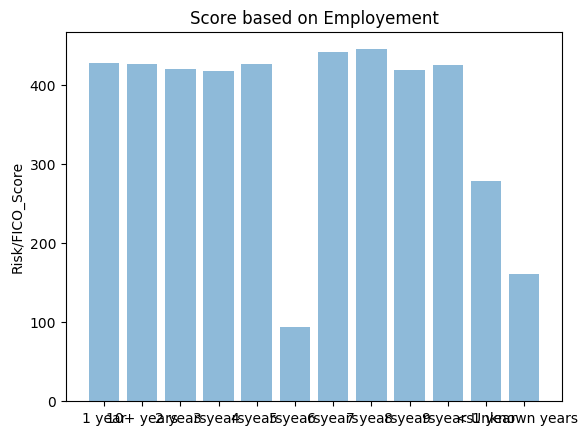

In [124]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#rcParams['figure.figsize']=10,5
 
objects = df1['Employment Length']
y_pos = np.arange(len(objects))
performance = df1['Risk_Score']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Risk/FICO_Score')
plt.title('Score based on Employement')
 
plt.show()

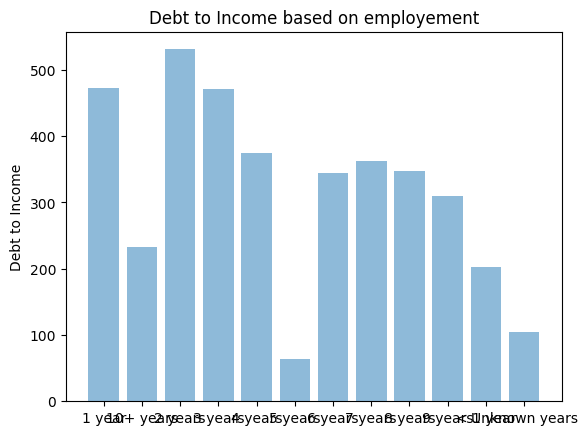

In [126]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
#rcParams['figure.figsize']=10,5
 
objects = df1['Employment Length']
y_pos = np.arange(len(objects))
performance = df1['Debt-To-Income Ratio']
 
plt.bar(y_pos, performance, align='center', alpha=1.0)
plt.xticks(y_pos, objects)
plt.ylabel('Debt to Income')
plt.title('Debt to Income based on employement')
 
plt.show()

In [134]:
df1.head(2)

,Application Date,Amount Requested,Risk_Score,Debt-To-Income Ratio
0,2007,8547.615013,539.419416,1151.718447
1,2008,8612.787788,516.151515,1773.825622


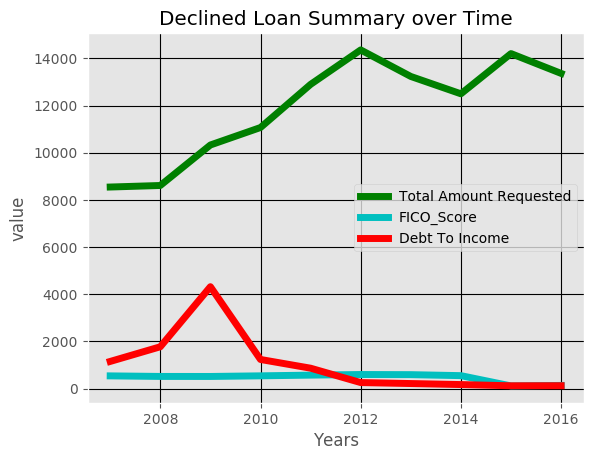

In [141]:
from matplotlib import pyplot as plt
from matplotlib import style
#rcParams['figure.figsize']=10,5

style.use('ggplot')

x = df1['Application Date']
y = df1['Amount Requested']

x2 = df1['Application Date']
y2 = df1['Risk_Score']

x3 = df1['Application Date']
y3 = df1['Debt-To-Income Ratio']


plt.plot(x,y,'g',label='Total Amount Requested', linewidth=5)
plt.plot(x2,y2,'c',label='FICO_Score',linewidth=5)
plt.plot(x3,y3,'r',label='Debt To Income',linewidth=5)

plt.title('Declined Loan Summary over Time')
plt.ylabel('value')
plt.xlabel('Years')

plt.legend()
#plt.xticks(np.arange(min(x), max(x)+1, 2.0))
plt.grid(True,color='k')

plt.show()